In [23]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_excel('../dataset/task_exec.xlsx')

In [8]:
print(df.head(5))

                 Time  Lounge  Gate  Duration  People
0 2024-01-31 23:43:00      60    71        28  吴鸣杰施圣卿
1 2024-02-01 00:14:00     187   617        20      胡强
2 2024-02-01 00:18:00      88    79        33     储卫刚
3 2024-02-01 00:39:00     187   616        22      金台
4 2024-02-01 01:00:00      60    67        36     包金良


In [9]:
# 计算缺失
missing = df['People'].isnull().sum()
print('缺失率', missing/len(df))

缺失率 0.0


In [8]:
import sys 
sys.path.append('../')
sys.path.append('../airports_sim/')
from airports_sim.airports import airports
airport = airports()
flights_path = '../dataset/flights_obs.xlsx'
aviation_path =  '../dataset/new_aviationCompany.xlsx'
crew_zizhi_path = '../dataset/人员资质证明.xlsx'
crew_group_path = '../dataset/人员组别.xlsx'
gate_lounge_path = '../dataset/Gate_lounge.xlsx'
airport.login(aviation_path,flights_path,crew_zizhi_path,crew_group_path,gate_lounge_path)

Flights login success,len is  21462


In [14]:
print(airport.flightSet.df_flights.head(5))

  航班类别      机号    机型   机位  plan_date plan_time 航空公司     type  \
0  PAX   9MXXU  A333   71 2024-02-01  00:20:00   D7  inbound   
1  CGO  JA601F  B763  617 2024-02-01  00:40:00   NH  inbound   
2  PAX  JA212P  A20N   79 2024-02-01  00:20:00   MM  inbound   
3  CGO  JA8970  B763  616 2024-02-01  00:55:00   NH  inbound   
4  PAX  JA829A  B788   67 2024-02-01  01:15:00   NH  inbound   

      actual_datetime  
0 2024-01-31 23:43:00  
1 2024-02-01 00:14:00  
2 2024-02-01 00:18:00  
3 2024-02-01 00:39:00  
4 2024-02-01 01:00:00  


In [26]:
print(airport.flightSet.df_flights.shape[0])

7589


Text(0.5, 1.0, 'Flights count in Feburary')

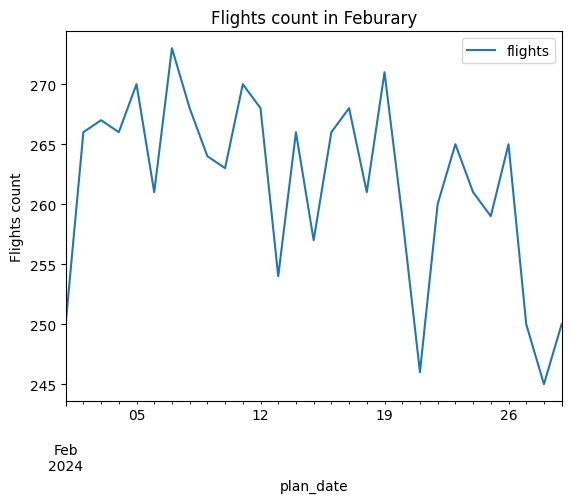

In [25]:

airport.flightSet.df_flights.groupby('plan_date').count().plot(y='plan_time')
plt.legend(['flights'])
plt.ylabel('Flights count')
plt.title('Flights count in Feburary')